# Training Notebook for Transformer
To be run using on the Google Colab servers

### Global setup

In [5]:
import os
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from time import strftime

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Connect to Github repository and import code

In [ ]:
# RUN THIS ONCE AT THE START OF THE SESSION
# clone github repository
!rm -rf /content/VQ-VAE-Tranformer-Image-Gen
!git clone --single-branch --branch modern https://github.com/patrickmastorga/VQ-VAE-Tranformer-Image-Gen.git

# add repo to sys path to allow imports
import sys
sys.path.append('/content/VQ-VAE-Tranformer-Image-Gen')

Cloning into 'VQ-VAE-Tranformer-Image-Gen'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (42/42), done.
^C


In [31]:
# RUN THIS AT THE START AS WELL AS EVERY TIME THE REPO IS UPDATED
# pull changes from github
%cd /content/VQ-VAE-Tranformer-Image-Gen
!git pull origin modern

# refrsh the imports
from importlib import reload
import TF.model
reload(TF.model)
import VQ.model
reload(VQ.model)

from VQ.model import Encoder, Decoder, Quantizer, VQ_VAE, LATENT_W, LATENT_H, NUM_EMBEDDINGS
from TF.model import TransformerPrior, VOCAB_SIZE, SEQ_LEN, BOS_ID

assert VOCAB_SIZE == NUM_EMBEDDINGS + 1
assert SEQ_LEN == LATENT_H * LATENT_W

/content/VQ-VAE-Tranformer-Image-Gen
From https://github.com/patrickmastorga/VQ-VAE-Tranformer-Image-Gen
 * branch            modern     -> FETCH_HEAD
Already up to date.


### Load pretrained Decoder and CelebA embeddings

Loading dataset...
Loading VQ-VAE model...


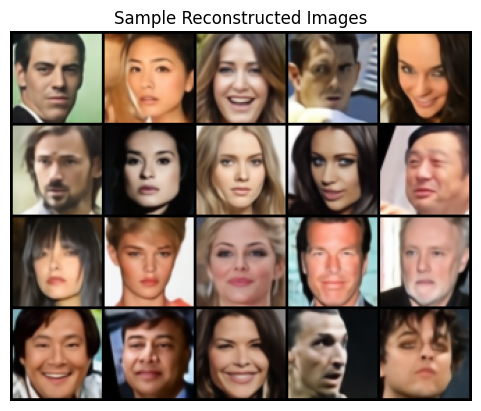

In [9]:
INDICES_PATH = '/content/drive/MyDrive/vq_models/vq16_celeba_indices_uint16.pt'
CHECKPOINT_PATH = '/content/drive/MyDrive/vq_models/vq16_17000.pt'

# load CelebA embeddings dataset
print('Loading dataset...')
celeba_embeddings = torch.utils.data.TensorDataset(torch.load(INDICES_PATH))

# load VQ-VAE model parameters
print('Loading VQ-VAE model...')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
encoder = Encoder()
decoder = Decoder()
quantizer = Quantizer()
vq_vae = VQ_VAE(encoder, decoder, quantizer).to(device)
vq_vae.eval()

checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)
vq_vae.load_state_dict(checkpoint['model_state'])

# visualize
grid_x = 5
grid_y = 4

samples = torch.stack([celeba_embeddings[i][0] for i in range(grid_x * grid_y)]).long().to(device)
images = vq_vae.reconstruct_from_indices(samples.view(-1, LATENT_W, LATENT_H))
img = torchvision.utils.make_grid(images, grid_x, normalize=True, value_range=(0, 1))

plt.title(f'Sample Reconstructed Images')
plt.axis('off')
plt.imshow(img.permute(1,2,0).cpu())

### Initialize Model and dataloader

In [32]:
BATCH_SIZE = 256

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataloader = torch.utils.data.DataLoader(celeba_embeddings, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
model = TransformerPrior().to(device)

### Train model

05:05:20 Begin Training
05:06:08 TRAINING Step [100/31660]; Loss: 5.989412
05:06:55 TRAINING Step [200/31660]; Loss: 5.660072
05:07:43 TRAINING Step [300/31660]; Loss: 5.468302
05:08:30 TRAINING Step [400/31660]; Loss: 5.317890
05:09:18 TRAINING Step [500/31660]; Loss: 5.243589
05:10:05 TRAINING Step [600/31660]; Loss: 5.191240
05:10:53 TRAINING Step [700/31660]; Loss: 5.150216
05:11:40 TRAINING Step [800/31660]; Loss: 5.112553
05:12:28 TRAINING Step [900/31660]; Loss: 5.084461
05:13:15 TRAINING Step [1000/31660]; Loss: 5.055203
05:14:03 TRAINING Step [1100/31660]; Loss: 5.031956
05:14:51 TRAINING Step [1200/31660]; Loss: 5.011184
05:15:38 TRAINING Step [1300/31660]; Loss: 4.990149
05:16:26 TRAINING Step [1400/31660]; Loss: 4.968876
05:17:13 TRAINING Step [1500/31660]; Loss: 4.950963
05:18:01 TRAINING Step [1600/31660]; Loss: 4.936352
05:18:48 TRAINING Step [1700/31660]; Loss: 4.915432
05:19:36 TRAINING Step [1800/31660]; Loss: 4.901341
05:20:23 TRAINING Step [1900/31660]; Loss: 4.8888

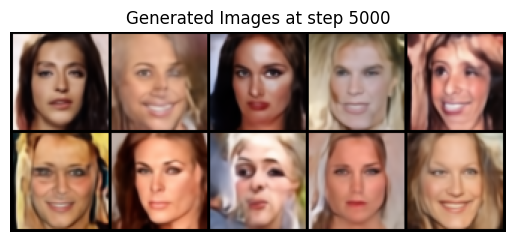

05:45:46 TRAINING Step [5100/31660]; Loss: 4.645254
05:46:34 TRAINING Step [5200/31660]; Loss: 4.645946
05:47:21 TRAINING Step [5300/31660]; Loss: 4.638400
05:48:09 TRAINING Step [5400/31660]; Loss: 4.638417
05:48:56 TRAINING Step [5500/31660]; Loss: 4.634872
05:49:44 TRAINING Step [5600/31660]; Loss: 4.630788
05:50:31 TRAINING Step [5700/31660]; Loss: 4.624831
05:51:19 TRAINING Step [5800/31660]; Loss: 4.624783
05:52:06 TRAINING Step [5900/31660]; Loss: 4.617802
05:52:54 TRAINING Step [6000/31660]; Loss: 4.615742
05:53:41 TRAINING Step [6100/31660]; Loss: 4.611089
05:54:29 TRAINING Step [6200/31660]; Loss: 4.611400
05:55:16 TRAINING Step [6300/31660]; Loss: 4.608636
05:56:04 TRAINING Step [6400/31660]; Loss: 4.595981
05:56:51 TRAINING Step [6500/31660]; Loss: 4.592650
05:57:39 TRAINING Step [6600/31660]; Loss: 4.593684
05:58:26 TRAINING Step [6700/31660]; Loss: 4.590894
05:59:14 TRAINING Step [6800/31660]; Loss: 4.591085
06:00:01 TRAINING Step [6900/31660]; Loss: 4.585830
06:00:49 TRA

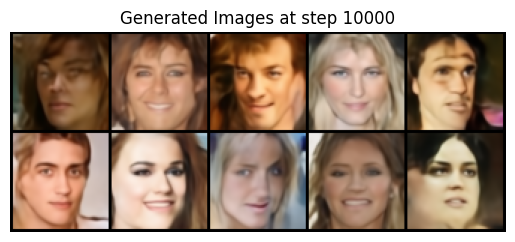

06:25:25 TRAINING Step [10100/31660]; Loss: 4.516099
06:26:12 TRAINING Step [10200/31660]; Loss: 4.512941
06:27:00 TRAINING Step [10300/31660]; Loss: 4.513275
06:27:47 TRAINING Step [10400/31660]; Loss: 4.509565
06:28:35 TRAINING Step [10500/31660]; Loss: 4.513059
06:29:22 TRAINING Step [10600/31660]; Loss: 4.513865
06:30:10 TRAINING Step [10700/31660]; Loss: 4.505676
06:30:57 TRAINING Step [10800/31660]; Loss: 4.501999
06:31:45 TRAINING Step [10900/31660]; Loss: 4.501558
06:32:32 TRAINING Step [11000/31660]; Loss: 4.501997
06:33:20 TRAINING Step [11100/31660]; Loss: 4.501350
06:34:07 TRAINING Step [11200/31660]; Loss: 4.488548
06:34:55 TRAINING Step [11300/31660]; Loss: 4.494904
06:35:42 TRAINING Step [11400/31660]; Loss: 4.494575
06:36:30 TRAINING Step [11500/31660]; Loss: 4.490794
06:37:17 TRAINING Step [11600/31660]; Loss: 4.484345
06:38:05 TRAINING Step [11700/31660]; Loss: 4.492168
06:38:52 TRAINING Step [11800/31660]; Loss: 4.486578
06:39:40 TRAINING Step [11900/31660]; Loss: 4.

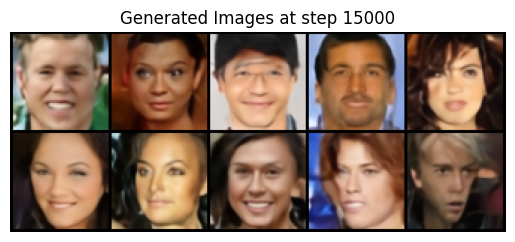

07:05:03 TRAINING Step [15100/31660]; Loss: 4.448729
07:05:51 TRAINING Step [15200/31660]; Loss: 4.447016
07:06:38 TRAINING Step [15300/31660]; Loss: 4.441217
07:07:26 TRAINING Step [15400/31660]; Loss: 4.441634
07:08:13 TRAINING Step [15500/31660]; Loss: 4.444156
07:09:01 TRAINING Step [15600/31660]; Loss: 4.443371
07:09:48 TRAINING Step [15700/31660]; Loss: 4.440293
07:10:36 TRAINING Step [15800/31660]; Loss: 4.440681
07:11:23 TRAINING Step [15900/31660]; Loss: 4.435720
07:12:11 TRAINING Step [16000/31660]; Loss: 4.433488
07:12:58 TRAINING Step [16100/31660]; Loss: 4.431626
07:13:46 TRAINING Step [16200/31660]; Loss: 4.434781
07:14:33 TRAINING Step [16300/31660]; Loss: 4.432391
07:15:21 TRAINING Step [16400/31660]; Loss: 4.433435
07:16:08 TRAINING Step [16500/31660]; Loss: 4.433333
07:16:56 TRAINING Step [16600/31660]; Loss: 4.429095
07:17:43 TRAINING Step [16700/31660]; Loss: 4.432736
07:18:31 TRAINING Step [16800/31660]; Loss: 4.429022
07:19:18 TRAINING Step [16900/31660]; Loss: 4.

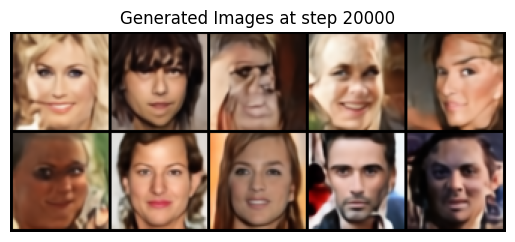

07:44:42 TRAINING Step [20100/31660]; Loss: 4.402276
07:45:29 TRAINING Step [20200/31660]; Loss: 4.404546
07:46:17 TRAINING Step [20300/31660]; Loss: 4.403680
07:47:04 TRAINING Step [20400/31660]; Loss: 4.401423
07:47:52 TRAINING Step [20500/31660]; Loss: 4.396240
07:48:39 TRAINING Step [20600/31660]; Loss: 4.398972
07:49:27 TRAINING Step [20700/31660]; Loss: 4.389404
07:50:14 TRAINING Step [20800/31660]; Loss: 4.392025
07:51:02 TRAINING Step [20900/31660]; Loss: 4.393190
07:51:49 TRAINING Step [21000/31660]; Loss: 4.391553
07:52:37 TRAINING Step [21100/31660]; Loss: 4.390278
07:53:24 TRAINING Step [21200/31660]; Loss: 4.392709
07:54:12 TRAINING Step [21300/31660]; Loss: 4.394769
07:54:59 TRAINING Step [21400/31660]; Loss: 4.395185
07:55:47 TRAINING Step [21500/31660]; Loss: 4.390910
07:56:34 TRAINING Step [21600/31660]; Loss: 4.392076
07:57:22 TRAINING Step [21700/31660]; Loss: 4.387001
07:58:09 TRAINING Step [21800/31660]; Loss: 4.386838


In [ ]:
# training hyperparameters
EPOCHS = 20
LEARNING_RATE = 2e-4
LOG_INTERVAL = 100
SAVE_INTERVAL = 5000
SAVE_PATH = '/content/drive/MyDrive/tf_models/tf16_large' # THE SUFFIX '_{training_step}.pt' will be appended

# optionally, resume training from a checkpoint
CONTINUE_FROM_CHECKPOINT = False #  # str | None
CHECKPOINT_PATH = '/content/drive/MyDrive/tf_models/tf16_5000.pt'

# optmizer and training state vars
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_state = {
    'losses': [],
    'logging_steps': [],
    'running_loss': 0.0,
    'steps': 0
}

# load from checkpoint
if CONTINUE_FROM_CHECKPOINT:
    train_state = torch.load(CHECKPOINT_PATH, map_location=device)
    model.load_state_dict(train_state['model_state'])
    optimizer.load_state_dict(train_state['optmiizer_state'])
    print(f'Checkpoint loaded. Resuming from training step {train_state['steps']}.')


# training loop
print(f'{strftime('%H:%M:%S')} Begin Training')
end_step = train_state['steps'] + len(dataloader) * EPOCHS
model.train()
for epoch in range(EPOCHS):
    for batch_idx, batch in enumerate(dataloader):
        # training step
        targets, = batch
        targets = targets.to(device).long()
        inputs = torch.empty_like(targets)
        inputs[:, 0] = BOS_ID
        inputs[:, 1:] = targets[:, :-1]

        logits = model(inputs)
        loss = nn.functional.cross_entropy(
            logits.view(-1, VOCAB_SIZE),
            targets.view(-1)
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_state['steps'] += 1
        train_state['running_loss'] += loss.item()

        # logging step
        if train_state['steps'] % LOG_INTERVAL == 0:
            avg_loss = train_state['running_loss'] / LOG_INTERVAL
            train_state['running_loss'] = 0.0
            train_state['losses'].append(avg_loss)
            print(f'{strftime('%H:%M:%S')} TRAINING Step [{train_state['steps']}/{end_step}]; Loss: {avg_loss:.6f}')

        # saving step
        if train_state['steps'] % SAVE_INTERVAL == 0 or (epoch == EPOCHS - 1 and batch_idx == len(dataloader) - 1):
            train_state['model_state'] = model.state_dict()
            train_state['optmiizer_state'] = optimizer.state_dict()
            model_save_path = f'{SAVE_PATH}_{train_state['steps']}.pt'
            torch.save(train_state, model_save_path)
            print(f'{strftime('%H:%M:%S')} Checkpoint saved at step {train_state['steps']} to {model_save_path}')

            # visualize reconstructions
            grid_x = 5
            grid_y = 2

            model.eval()
            samples = model.generate(grid_x * grid_y)
            model.train()

            images = vq_vae.reconstruct_from_indices(samples.view(-1, LATENT_W, LATENT_H))
            img = torchvision.utils.make_grid(images, grid_x, normalize=True, value_range=(0, 1))

            plt.title(f'Generated Images at step {train_state['steps']}')
            plt.axis('off')
            plt.imshow(img.permute(1,2,0).cpu())
            plt.show()

print(f'Training complete.')

# Prepare reconstructions
grid_x = 5
grid_y = 4

model.eval()
samples = model.generate(grid_x * grid_y)

images = vq_vae.reconstruct_from_indices(samples.view(-1, LATENT_W, LATENT_H))
img = torchvision.utils.make_grid(images, grid_x, normalize=True, value_range=(0, 1))

# Side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Loss curves
axes[0].plot(train_state['logging_steps'], train_state['losses'])

axes[0].set_xlabel('Training Step')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss over Training Steps')
axes[0].grid(True)

# Reconstructions
axes[1].imshow(img.permute(1, 2, 0).cpu())
axes[1].set_title('Generated Images')
axes[1].axis('off')

plt.tight_layout()
plt.show()